In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
dataset = pd.read_csv("breast_cancer.csv")
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

AttributeError: module 'seaborn' has no attribute 'plt'

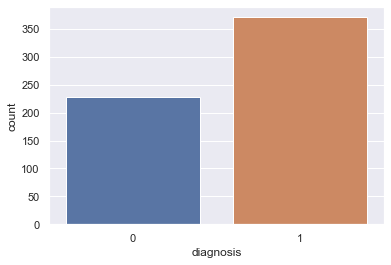

In [16]:
sns.countplot(dataset['diagnosis'],label="Count")
sns.plt.show()

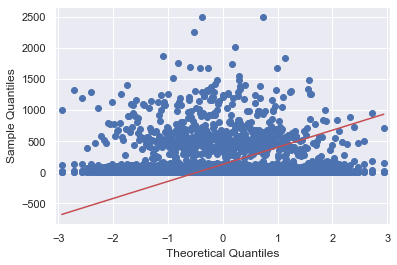

In [17]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dataset, line='s')
plt.show()

In [18]:
Y = dataset['diagnosis'].values
X = dataset.drop('diagnosis', axis=1).values

In [19]:
# Splitting into a training and testing set, 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [20]:
# Standardizing values
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

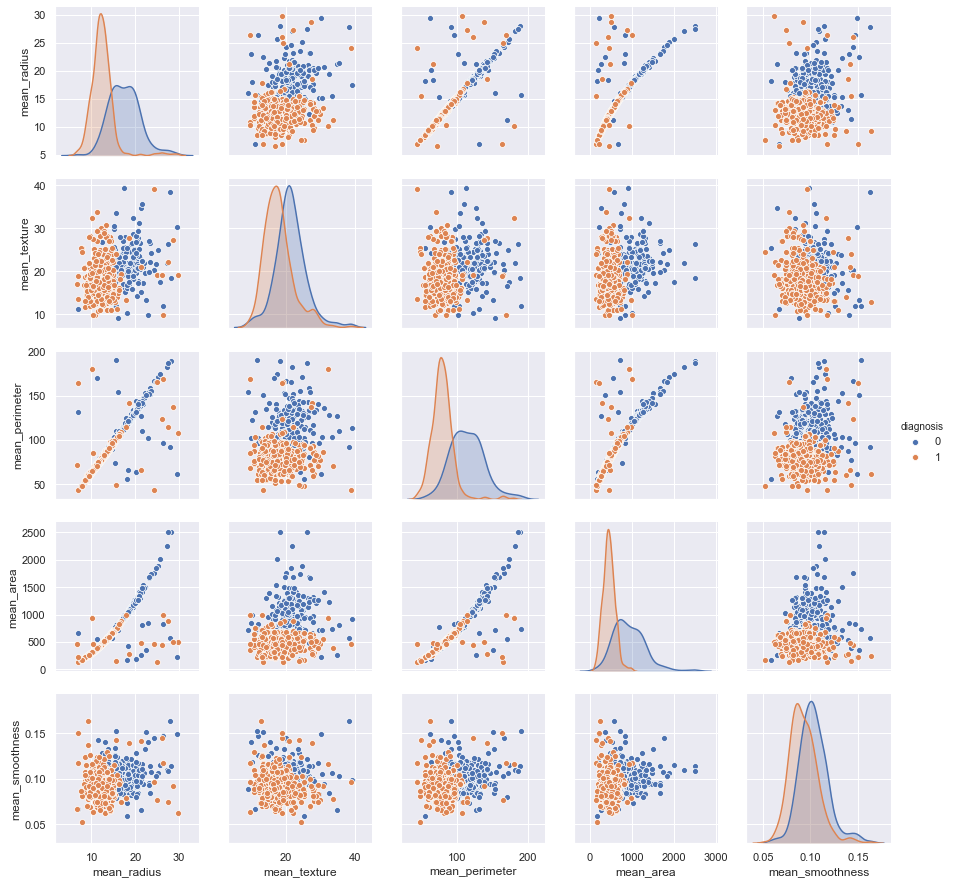

In [21]:

sns.pairplot(dataset, vars=['mean_radius','mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], kind='scatter', hue='diagnosis')

In [22]:
#fitting a random forest model to the training set
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
#Testing the model
Y_test_predRF = tree.predict(X_test)


In [24]:
print('RESULTS')
print('Accuracy: ', accuracy_score(Y_test, Y_test_predRF))
print('Classification report')
print(classification_report(Y_test, Y_test_predRF))


RESULTS
Accuracy:  0.8833333333333333
Classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        68
           1       0.91      0.90      0.91       112

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

